In [80]:
# Code for transient 1D convection. 

%matplotlib notebook
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# Define problem parameter:
c = 2 # Wave speed

# Define gird params:
nx = 71; xmin = 0.; xmax = 10.
x = numpy.linspace(xmin,xmax,nx);
dx = (xmax-xmin)/(nx-1);
u0 = numpy.zeros(nx);

#Define time parameters:
dt = 0.01; time = 0.
sigma = c*dt/dx;

print(sigma)

# Define initial conditions
for i in range (nx):
    #if (x[i] >= 2.0 and x[i] < 4.0):
    #    u0[i] = 0.5*(1.0 - numpy.cos(2.0*numpy.pi*(x[i]-2.)/2.0));
    #    u0[i] = 1;
    
    u0[i] = numpy.sin(2*4*numpy.pi*x[i]/10);

0.14


<IPython.core.display.Javascript object>


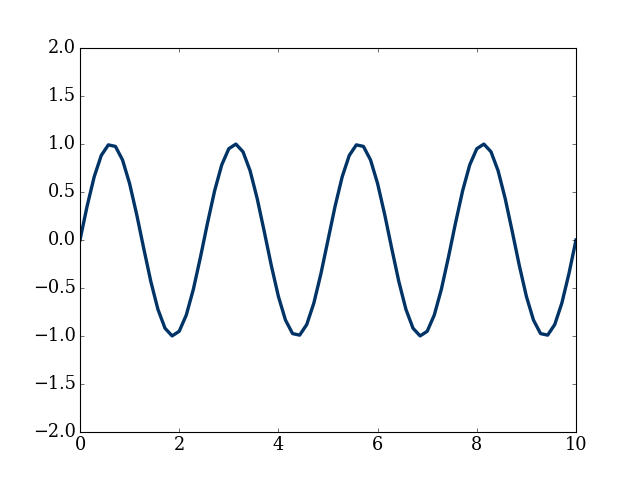

In [81]:
pyplot.figure();
pyplot.plot(x, u0, color='#003366', ls='-', lw=3)
pyplot.ylim(-2,2);

In [82]:
Ntime = 500;

# Using RK2 time, backward space (1st Order in space and time)
uCFD  = numpy.copy(u0);
unew = numpy.copy(u0);
usr  = numpy.copy(u0);
dudx = numpy.zeros_like(u0);

uCFDP = numpy.zeros((Ntime,nx));

amp_min = 1.0E10; amp_max = 0.0; eps = 0.2;

for iter in range (Ntime):
    
    # Stage 1
    #--------
    # Compute spatial derivatives
    dudx[0] = 0.0#dudx[nx-1];
    dudx[1:] = 2/dx*(uCFD[1:]-uCFD[:-1]) - dudx[:-1];
    
    for i in range (1, nx):
        usr[i] = uCFD[i] - 0.5*dt*c*dudx[i];
        #usr[i] = uCFD[i] - 0.5*dt*uCFD[i]*dudx[i];
    #Impose BC
    usr[0] = usr[-1];    
    
    #------------------------------------------------------#
    ##Try some damping
    #for i in range (1, nx-1):
    #    usr[i] = uCFD[i] - 0.5*(dt*c*dudx[i] + \
    #             eps*(uCFD[i-1] - 2*uCFD[i] + uCFD[i+1]));
    ##Impose BC
    #usr[-1] = uCFD[-1] - 0.5*(dt*c*dudx[-1] + \
    #             eps*(uCFD[-2] - 2*uCFD[-1] + uCFD[0]));
    #usr[0] = usr[-1];
    #------------------------------------------------------#
    
    # Stage 2
    #--------
    # Compute spatial derivatives
    dudx[0] = 0.0#dudx[nx-1];
    dudx[1:] = 2/dx*(usr[1:]-usr[:-1]) - dudx[:-1];
        
    for i in range (1, nx):
        unew[i] = uCFD[i] - dt*c*dudx[i];         
        #unew[i] = uCFD[i] - dt*usr[i]*dudx[i];
    #Impose BC
    unew[0] = unew[-1];    
    
    # Copy values to old array
    uCFD = numpy.copy(unew);
    uCFDP[iter][:] = numpy.copy(unew);
    time = time + dt;
    
    
    #Test for min/ max amplitudes
    amp = numpy.max(abs(uCFD));
    if amp > amp_max:
        amp_max = amp;
    elif amp < amp_min:
        amp_min = amp;
        
print('Max amplitude:', amp_max);
print('Min amplitude:', amp_min);

Max amplitude: 1.16887375737
Min amplitude: 0.754711574748


<IPython.core.display.Javascript object>


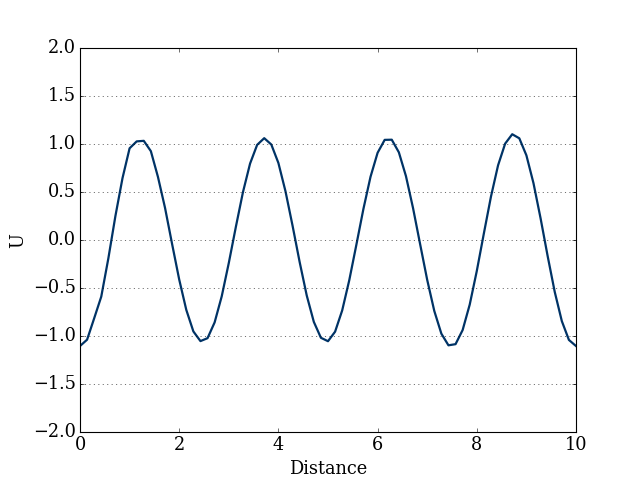

In [83]:
from matplotlib import animation

def animate(data):
    x = numpy.linspace(0,10,nx)
    y = data
    line.set_data(x,y)
    return line,

fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,10),ylim=(-2,2),xlabel=('Distance'),ylabel=('U'));
ax.set_yticks([-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0], minor=True)
ax.yaxis.grid(True, which='minor')
line, = ax.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=uCFDP, interval=50)